# Installations

In [2]:
from IPython.display import clear_output
!pip install -q tensorflow==2.3.1
clear_output

     |████████████████████████████████| 320.4 MB 25 kB/s 
     |████████████████████████████████| 2.9 MB 50.4 MB/s 
     |████████████████████████████████| 459 kB 47.5 MB/s 
     |████████████████████████████████| 20.1 MB 12.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.18.5 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
plotnine 0.8.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
jaxlib 0.3.15+cuda11.cudnn805 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
jax 0.3.17 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.
cmdstanpy 1.0.7 requires numpy>=1.21, but you have numpy 1.18.5 which is incompatible.


<function IPython.core.display.clear_output(wait=False)>

In [3]:
!pip install -q tensorflow_quantum==0.4.0
clear_output

     |████████████████████████████████| 5.9 MB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 50.1 MB/s 
     |████████████████████████████████| 5.6 MB 22.5 MB/s 
     |████████████████████████████████| 1.3 MB 51.3 MB/s 
     |████████████████████████████████| 211 kB 58.9 MB/s 
     |████████████████████████████████| 211 kB 56.8 MB/s 
     |████████████████████████████████| 211 kB 59.0 MB/s 
     |████████████████████████████████| 241 kB 67.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.10.0 requires protobuf<4,>=3.13, but you have protobuf 3.12.4 which is incompatible.


<function IPython.core.display.clear_output(wait=False)>

In [4]:
!pip install cirq==0.9.1
clear_output

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<function IPython.core.display.clear_output(wait=False)>

# Importing packages and the dataset

In [5]:
import tensorflow as tf
#DATA PROCESSING TOOLS
import numpy as np
from sklearn.model_selection import train_test_split
#QML TOOLS
import tensorflow_quantum as tfq
import cirq
import sympy
#VISUALIZATION TOOLS
from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt

In [6]:
print("The version of TensorFlow-Quantum: {}".format(tfq.__version__))
print("The version of cirq: {}".format(cirq.__version__))

The version of TensorFlow-Quantum: 0.4.0
The version of cirq: 0.9.1


In [7]:
#importing the Fashion MNIST from keras
from tensorflow.keras.datasets import fashion_mnist as dataset

In [8]:
(X_train,y_train),(X_test,y_test) = dataset.load_data()
clear_output

4423680/4422102 [==============================] - 0s 0us/step


<function IPython.core.display.clear_output(wait=False)>

In [9]:
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


# Data Preprocessing

In [10]:
def data_filter(x,y):
  """
  Filters the dataset
  """
  #using labels
  keep = (y==5) | (y==9) #we are taking labels 5 and 9 == sandals and ankle boots
  x,y = x[keep],y[keep]
  #convert to boolean
  #y=True if y==5
  y = y == 5
  return x,y

In [11]:
#filtering the training data
X_train,y_train = data_filter(X_train,y_train)
#filtering the testing data
X_test, y_test = data_filter(X_test,y_test)

In [12]:
print("Shape of X_train:{}".format(X_train.shape))
print("Shape of y_train:{}".format(y_train.shape))
print("Shape of X_test:{}".format(X_test.shape))
print("Shape of y_test:{}".format(y_test.shape))

Shape of X_train:(12000, 28, 28)
Shape of y_train:(12000,)
Shape of X_test:(2000, 28, 28)
Shape of y_test:(2000,)


First image label:False


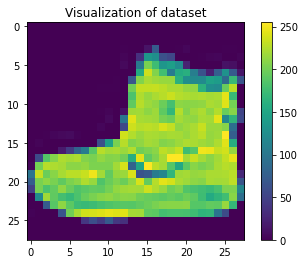

In [13]:
#first image of X_train and corresponding label of y_train
print("First image label:{}".format(y_train[0]))
plt.imshow(X_train[0])
plt.colorbar()
plt.title("Visualization of dataset")
plt.show()

We have grayscale images in the dataset. Their values range from 0 to 255. We will have to scale these to range from 0 to 1, which will help us converge our CNN faster.

In [14]:
#normalizing the train and test image data
X_train = X_train/255.0
X_test = X_test/255.0

First image label:False


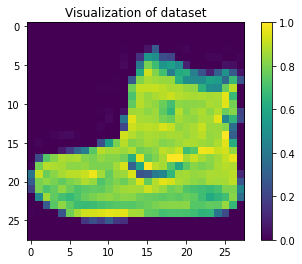

In [15]:
#view the data again
print("First image label:{}".format(y_train[0]))
plt.imshow(X_train[0])
plt.colorbar()
plt.title("Visualization of dataset")
plt.show()

In [16]:
#reshaping the dataset (for tensorflow)
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))

In [17]:
#downscaling the images for quantum computing purposes
X_train = tf.image.resize(X_train,(2,2)).numpy()
X_test = tf.image.resize(X_test, (2,2)).numpy()

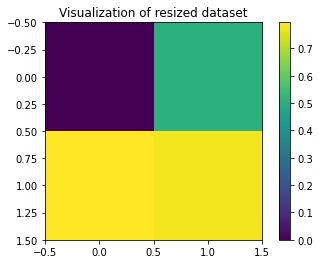

In [18]:
#view the data again
plt.imshow(X_train[0,:,:,0])
plt.colorbar()
plt.title("Visualization of resized dataset")
plt.show()

In [19]:
#splitting the dataset intro training and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size = 0.15,random_state=0)

In [20]:
print("Shape of X_train:{}".format(X_train.shape))
print("Shape of y_train:{}".format(y_train.shape))
print("Shape of X_valid:{}".format(X_valid.shape))
print("Shape of y_valid:{}".format(y_valid.shape))

Shape of X_train:(10200, 2, 2, 1)
Shape of y_train:(10200,)
Shape of X_valid:(1800, 2, 2, 1)
Shape of y_valid:(1800,)


# Data Encoding

Steps: 


*   Processing pixel values for binary encoding
*   Converting Cirq circuits to tfq tensors



**STEP 1: Processing pixel values**

In [21]:
#flattening the images
X_train = X_train.reshape(X_train.shape[0], *(1,4,1))
X_valid = X_valid.reshape(X_valid.shape[0], *(1,4,1))
X_test = X_test.reshape(X_test.shape[0], *(1,4,1))

## Processing X_train

In [22]:
print(X_train[0])

[[[0.        ]
  [0.41568628]
  [0.7137255 ]
  [0.73921573]]]


In [23]:
def binary_encode(X,threshold=0.5):
  """
  Encodes the given dataset to use binary coding

  Parameters: 
  X(array): Image data to be processed for encoding
  threshold(float): Threshold for binary encoded image data
  
  Returns: 
  encoded_images(array): Binary encoded image data
  """
  encoded_images = list()
  for image in X:
    #pixel==1 if greater than threshold
    encoded_image = [1 if j>threshold else 0 for j in image[0]]
    encoded_images.append(encoded_image)
  return np.array(encoded_images)

In [24]:
X_train = binary_encode(X_train)

In [25]:
print(X_train[0])

[0 0 1 1]


In [26]:
print("Shape of X_train is {}".format(X_train.shape))

Shape of X_train is (10200, 4)


In [27]:
def create_circuit_from_image(encoded_image):
  """
  Returns a circuit for given encoded image

  Parameters: 
  encoded_image(array): Encoded image

  Returns:
  circuit(cirq.circuit object): cirq circuit
  """
  qubits = cirq.GridQubit.rect(2,2)
  circuit = cirq.Circuit()
  for i, pixel in enumerate(encoded_image):
    if pixel:
      circuit.append(cirq.X(qubits[i]))
  return circuit

In [28]:
X_train = [create_circuit_from_image(encoded_image)for encoded_image in X_train]

In [29]:
print(X_train[0])

(1, 0): ───X───

(1, 1): ───X───


In [31]:
X_train_tfq = tfq.convert_to_tensor(X_train)

### Preprocessing X_valid and X_test

In [32]:
X_valid = binary_encode(X_valid)
X_test = binary_encode(X_test)

In [33]:
X_valid = [create_circuit_from_image(encoded_image) for encoded_image in X_valid]
X_test = [create_circuit_from_image(encoded_image) for encoded_image in X_test]

In [34]:
X_valid_tfq = tfq.convert_to_tensor(X_valid)
X_test_tfq = tfq.convert_to_tensor(X_test)

### Quantum Neural Network

2 steps:
1. build a class that adds gates layer by layer
2. Define QNN from the class

In [42]:
class QNN():
    def __init__(self, data_qubits, readout):
      self.data_qubits = data_qubits
      self.readout = readout

    def add_singleQubit_gate(self,circuit, gate, qubit_index):
      """
      Adds single qubit gate to the circuit
      Parameters:
      circuit(cirq.Circuit object): Cirq circuit
      gate(cirq gate): gate to append to the circuit
      qubits(list): index of qubits to apply the gate 
      Returns:
      None
      """
      for index in qubit_index:
        circuit.append(gate(self.data_qubits[index]))

    def add_twoQubit_gate(self,circuit, gate, qubit_index):
      """
      Adds two qubit gate to the circuit
      Parameters:
      circuit(cirq.Circuit object): Cirq circuit
      gate(cirq gate): gate to append to the circuit
      qubits(list): index of qubits to apply the gate
      Returns:
      None
      """
      if len(qubit_index)!=2:
        raise Exception("The length of the list of indices passed for two qubit \
        gate operations must be equal to two")
      circuit.append(gate(self.data_qubits[qubit_index[0]], self.data_qubits[qubit_index[1]]))

    def add_layer(self, circuit, gate, symbol_gate):
      """
      Adds New Gates/Layers to the Circuit
      Parameters:
      circuit(cirq.Circuit object): Cirq circuit
      gate(cirq gate): gate to append to the circuit
      symbol_gate(string): symbol for the gate
      Returns:
      None
      """
      for i, qubit in enumerate(self.data_qubits):
        symbol = sympy.Symbol(symbol_gate+ '-' + str(i))
        circuit.append(gate(qubit, self.readout)**symbol)


In [43]:
def create_qnn():
  """
  Create a QNN model circuit and readout operation to go along with it.
  """
  data_qubits = cirq.GridQubit.rect(2,2)
  readout = cirq.GridQubit(-1, -1)
  circuit = cirq.Circuit()

  circuit.append(cirq.X(readout))
  circuit.append(cirq.H(readout))

  qnn = QNN(
      data_qubits = data_qubits,
      readout = readout
  )
  #adding the ising coupling XX gate
  qnn.add_layer(circuit,cirq.XX,"xx")
  qnn.add_layer(circuit,cirq.ZZ,"zz")

  circuit.append(cirq.H(readout))
  return circuit, cirq.Z(readout)


In [44]:
qmodel, model_readout = create_qnn()

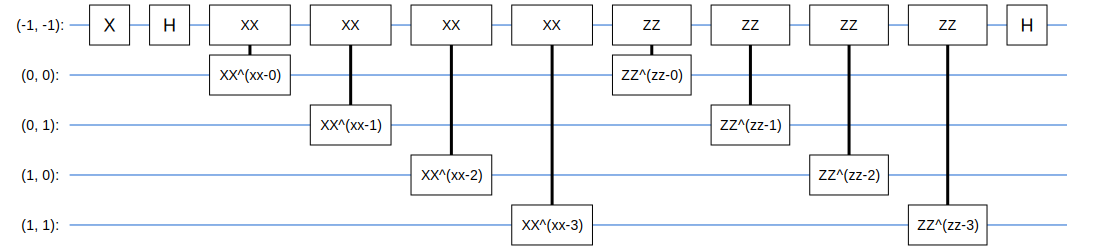

In [45]:
SVGCircuit(qmodel)

In [46]:
model = tf.keras.Sequential([
                             
    # The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Input(shape=(), dtype=tf.string),

    
    # The PQC stands for Paramaterized Quantum Circuit
    # This returns the expectation value
    tfq.layers.PQC(qmodel, model_readout),
])

In [47]:
y_train_h = np.array([1 if i==1 else -1 for i in y_train ])
y_valid_h = np.array([1 if i==1 else -1 for i in y_valid ])
y_test_h = np.array([1 if i==1 else -1 for i in y_test ])

In [48]:
print(y_train_h[0])

1


In [49]:
# Define the custom Hinge Accuracy
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

### Training the QNN

In [50]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[hinge_accuracy])

In [51]:
qnn_history = model.fit(
      X_train_tfq, y_train_h,
      batch_size=64,
      epochs=10,
      verbose=1,
      validation_data=(X_valid_tfq, y_valid_h))

Epoch 1/10
160/160 [==============================] - 4s 25ms/step - loss: 0.5218 - hinge_accuracy: 0.8023 - val_loss: 0.4249 - val_hinge_accuracy: 0.7958
Epoch 2/10
160/160 [==============================] - 4s 25ms/step - loss: 0.4009 - hinge_accuracy: 0.8028 - val_loss: 0.3989 - val_hinge_accuracy: 0.7958
Epoch 3/10
160/160 [==============================] - 5s 32ms/step - loss: 0.3930 - hinge_accuracy: 0.8027 - val_loss: 0.3982 - val_hinge_accuracy: 0.7958
Epoch 4/10
160/160 [==============================] - 4s 26ms/step - loss: 0.3928 - hinge_accuracy: 0.8027 - val_loss: 0.3988 - val_hinge_accuracy: 0.7958
Epoch 5/10
160/160 [==============================] - 4s 25ms/step - loss: 0.3928 - hinge_accuracy: 0.8025 - val_loss: 0.3983 - val_hinge_accuracy: 0.7958
Epoch 6/10
160/160 [==============================] - 4s 25ms/step - loss: 0.3928 - hinge_accuracy: 0.8027 - val_loss: 0.3990 - val_hinge_accuracy: 0.7958
Epoch 7/10
160/160 [==============================] - 4s 25ms/step - l

In [52]:
model.evaluate(X_test_tfq, y_test_h)

63/63 [==============================] - 1s 20ms/step - loss: 0.3686 - hinge_accuracy: 0.8229


[0.3685799837112427, 0.8229166865348816]

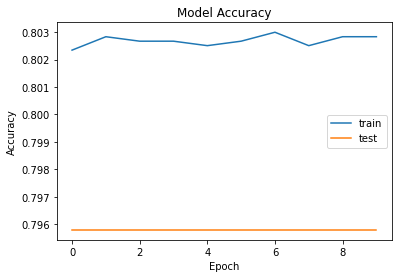

In [53]:
# Visualize Accuracy
plt.plot(qnn_history.history['hinge_accuracy'])
plt.plot(qnn_history.history['val_hinge_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc="best")
plt.show()

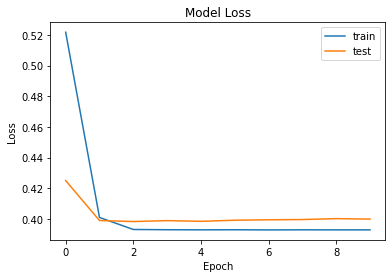

In [54]:
# Visualize Loss
plt.plot(qnn_history.history['loss'])
plt.plot(qnn_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc="best")
plt.show()

In [55]:
#Saving the weights
model.save_weights('/content/sample_data/QModelWeights')

# References

1. https://www.tensorflow.org/quantum/tutorials/mnist
2. https://quantumai.google/cirq/tutorials
3. Paper by Farhi et al. https://arxiv.org/pdf/1802.06002.pdf
4. Paper by Dmitri Maslov https://www.google.com/url?sa=t&source=web&rct=j&url=https://arxiv.org/pdf/1603.07678&ved=2ahUKEwi86KbBlfvuAhUmzDgGHfteCIsQFjAJegQIHhAC&usg=AOvVaw04beRgWLMZhYBV6GpyygHF